**Table of contents**<a id='toc0_'></a>    
- [Interacting with CSV/TSV files (and other similar filetypes)](#toc1_1_)    
  - [Interacting with Excel Files](#toc1_2_)    
  - [Interacting with SAS (Statistical Analysis System) and Stata (Statistics + Data) files](#toc1_3_)    
  - [Interacting with HDF5 (Hierarchical Data Format) files](#toc1_4_)    
  - [Interacting with `.mat` (MATLAB) files](#toc1_5_)    
  - [Interacting with SQL databases](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Reading data from different sources and Writing data to different file formats

Although it's great that we can create Series and DataFrame objects with our custom data, but in practice we will mostly be working with data that already exists. Also after cleaning up a data file we may like to export the cleaned up data to another file for future uses.

In [1]:
# import statements
import numpy as np
import pandas as pd

There are a bunch of functions in pandas that deal with ingesting data. They all begin with
`read_`. Similarly, there are analagous exporting methods on the dataframe object. These exporting
methods start with `.to_`.

### <a id='toc1_1_'></a>[Interacting with CSV/TSV files (and other similar filetypes)](#toc0_)

> Reading from a **CSV** file: `pd.read_csv(filepath, sep, delimiter=None, index_col=None, dtype=None, na_values=None)`

<u>Function Parameters</u>

- `filepath:` Path to the file to read. valid url can also be passed.
- `sep:` Separator (e.g. for tsv files, sep='\t'). Separators longer than 1 character and different from '\s+' will be interpreted as regular expressions.
- `index_col:` Column(s) to use as the row labels of the DataFrame, either given as string (name) or column index. If a sequence of int / str is given, a MultiIndex is used.
- `dtype:` Data type of the values.
- `na_values:` Additional strings to recognize as NA/NaN.
- `parse_dates:` The behavior is as follows --
    - bool. If True -> try parsing the index.
    - list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.
    - list of list. e.g. If [[1, 3]] -> combine columns 1 and 3 and parse as a single date column.
    - dict, e.g. {'foo' : [1, 3]} -> parse columns 1, 3 as date and call result ‘foo’
- `date_format:` Format to use for parsing dates. 
- `chunksize:` Define it to load the data in chunks instead of the whole thing at once. Specially useful for large files. If specified, returns an iterator where chunksize is the number of rows to include in each chunk (note that, each chunk is a dataframe). We can loop over this iterator to process the data in chunks. e.g. `for chunk in pd.read_csv('data.csv', chunksize=1000): process(chunk)`.

This can also read zip files containing only a single csv/tsv file without the need of extracting. But, if there's multiple files in the zip file then it must be unzipped before use.

**Note:** One thing to be aware of is that by default, pandas will write the index values in a CSV, but when reading a CSV it will create a new index unless we specify a column for the index.

In [2]:
alta_df = pd.read_csv("./Data/alta-noaa-1980-2019.csv", parse_dates=["DATE"]).set_index(
    "DATE"
)
alta_df.index.astype("datetime64[ns]")
alta_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,DASF,MDPR,MDSF,PRCP,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-01,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.10,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.43,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.09,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.00,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.00,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


> Writing to a **CSV** file: `df.to_csv(path_or_buf, sep, na_rep, encoding, date_format)`

<u>Function Parameters</u>

- path_or_buf : filepath.
- sep : delimiter for the output file (str, default `,`).
- na_rep : Missing data representation (str, default `''`).
- mode : Python write mode (str, default `w`).
- encoding: formatting to use in the output file (str, default `utf-8`)
- date_format: format string for datetime format. 

In [3]:
alta_df.to_csv("./tmp/alta_df.csv", na_rep="nan")  # be careful, ./tmp not /tmp

In [4]:
df = pd.read_csv("./tmp/alta_df.csv", index_col="DATE", na_values="nan")
df.index.astype("datetime64[ns]")
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,DASF,MDPR,MDSF,PRCP,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-01,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.10,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.43,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.09,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.00,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.00,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


### <a id='toc1_2_'></a>[Interacting with Excel Files](#toc0_)

**Note:** You will have to make sure `openpyxl` is installed to use Excel support. Simply installing the pandas library usually will not install full Excel support.

In [5]:
# ! pip install openpyxl

> Reading from **Excel** file: `pd.read_excel(io, sheet_name, header, names, index_col, usecols, dtype, na_values, parse_dates)`

<u>Function Parameters</u>
- io : filepath.
- sheet_name : default 0 (i.e, 1st sheet as a DataFrame). You can any of the following,
    - str: Strings are used for sheet names. 
    - int: Integers are used in zero-indexed sheet positions (chart sheets do not count as a sheet position).
    - Lists of strings/integers are used to request multiple sheets.
    - None: Specify None to get all worksheets.
- header : Row (0-indexed) to use for the column labels of the parsed DataFrame (int, default 0). If a list of integers is passed those row positions will be combined into a MultiIndex.
- names : List of column names to use. If file contains no header row, then you should explicitly pass header=None.
- index_col : Column (0-indexed) to use as the row labels of the DataFrame (int, default None). If a subset of data is selected with usecols, index_col is based on the subset.
- usecols : str, list-like, or callable, default None.
- dtype : Type name or, dict of {column: type}, default None. 
- na_values: Additional values to treat as NaN.
- parse_dates: Columns to treat as datetime objects.

> Writing to **Excel** file: `df.to_excel(excel_writer, sheet_name, na_rep, columns)`

<u>Function Parameters</u>
- excel_writer : To write a single object to an Excel .xlsx file it is only necessary to specify a target file name. To write to multiple sheets it is necessary to create an `ExcelWriter` object with a target file name, and specify a sheet in the file to write to.
- sheet_name : Name of sheet which will contain the DataFrame.
- na_rep : Missing data representation (str, default `''`).
- columns : Columns to write (optional, sequence or list of str).

**Note:** If there are any timezone aware datetime object in the dataframe we will first need to strip the timezone information using, `df.datetime_col.dt.tz_convert(tz=None)` before exporting to Excel.

In [6]:
alta_df_2012 = alta_df[alta_df.index.year == 2012]
# or, alta_df.loc['2012': '2012-12-31']
alta_df_2013 = alta_df[alta_df.index.year == 2013]

# writing alta_df data of 2012 in a sheet named '2012' and data of 2013 in a sheet named '2013'
with pd.ExcelWriter("./tmp/alta_df_demo.xlsx", engine="openpyxl") as Writer:
    alta_df_2012.to_excel(excel_writer=Writer, sheet_name="2012")
    alta_df_2013.to_excel(excel_writer=Writer, sheet_name="2013")

### <a id='toc1_3_'></a>[Interacting with SAS (Statistical Analysis System) and Stata (Statistics + Data) files](#toc0_)

These are two of the popular statistical software packages. Sometimes we may need to read data from these files. 

SAS files are important because SAS is a software suite that performs advanced analytics, multivariate analyses, business intelligence, data management, predictive analytics and is a standard for statisticians to do computational analysis. SAS is used a great deal in business analytics and biostatistics.

> The most common SAS files have the extension `.sas7bdat` and `.sas7bcat`, which are dataset files and catalog files respectively. To read these files we can use the `pd.read_sas()` function.

In [7]:
df_sas = pd.read_sas("./Data/sales.sas7bdat")

In [8]:
df_sas.head()

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000
2,1952.0,10.7,250.199997
3,1953.0,11.3,265.899994
4,1954.0,11.2,248.500000


> Stata is popular in academic social sciences research, such as economics and epidemiology. Stata files have extension `.dta` and we can import them using the `pd.read_stata()` function.

In [9]:
df_stata = pd.read_stata("./Data/disarea.dta")

In [10]:
df_stata.head()

,wbcode,country,disa1,disa2,disa3,disa4,disa5,disa6,disa7,disa8,...,disa16,disa17,disa18,disa19,disa20,disa21,disa22,disa23,disa24,disa25
0,AFG,Afghanistan,0.00,0.00,0.76,0.73,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.02,0.00,0.00
1,AGO,Angola,0.32,0.02,0.56,0.00,0.0,0.00,0.56,0.0,...,0.0,0.4,0.0,0.61,0.00,0.0,0.99,0.98,0.61,0.00
2,ALB,Albania,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.16
3,ARE,United Arab Emirates,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
4,ARG,Argentina,0.00,0.24,0.24,0.00,0.0,0.23,0.00,0.0,...,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.01,0.00,0.11


### <a id='toc1_4_'></a>[Interacting with HDF5 (Hierarchical Data Format) files](#toc0_)

In the Python world, consensus is rapidly converging on Hierarchical Data Format version 5, or 'HDF5,' as the standard mechanism for **storing large quantities of numerical data**. How large? It’s now relatively common to deal with datasets hundreds of gigabytes or even terabytes in size; HDF5 itself can scale up to exabytes.

<u>Resources</u>
- An introduction to HDF5 - https://www.youtube.com/watch?v=S74Kc8QYDac
- HDF5 with Python - https://www.youtube.com/watch?v=8OpMAlYyH5Y

<u>The structure of HDF5 files</u>

The basic structure of an HDF5 file is composed of two types of objects: groups and datasets. Groups are like folders, and datasets are like arrays or dataframes. We can think of groups as being like directories in a filesystem, and datasets as being like files within those directories. We can create groups to store related datasets together, and we can create subgroups within groups. We can also attach metadata to groups and datasets, which is stored in the form of key-value pairs.

We can access the group names with the `.keys()` method. But first we need to load the file with the `h5py.File(path, mode)` function from the `h5py` package.

In [11]:
import h5py
import matplotlib.pyplot as plt

In [12]:
ligo_hdf5 = h5py.File("./Data/L-L1_LOSC_4_V1-1126259446-32.hdf5")

In [13]:
ligo_hdf5.keys()

<KeysViewHDF5 ['meta', 'quality', 'strain']>

In [14]:
ligo_hdf5["quality"].keys()

<KeysViewHDF5 ['detail', 'injections', 'simple']>

In [15]:
group = ligo_hdf5["strain"]

for key in group.keys():
    print(key)

Strain


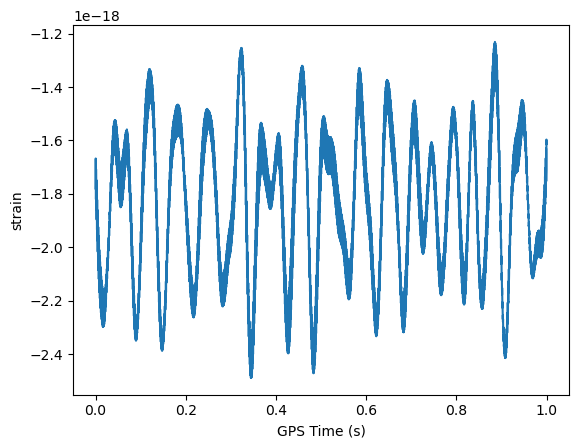

In [16]:
strain = np.array(ligo_hdf5["strain"]["Strain"])

# number of time points to sample
num_samples = 10000

# the time vector
time = np.arange(0, 1, 1 / num_samples)

# plotting the data
plt.plot(time, strain[:num_samples])
plt.xlabel("GPS Time (s)")
plt.ylabel("strain")
plt.show()

> To import data from HDF5 files directly we can use the `pd.read_hdf(path, key, mode="r")` function and to write data to a HDF5 file we can use the `pd.HDFStore(path, mode="w")` function. See the documentation for more details.

### <a id='toc1_5_'></a>[Interacting with `.mat` (MATLAB) files](#toc0_)

> We can use the `scipi.io.loadmat()` function to read data from a MATLAB file. This function returns a dictionary-like object with variable names as keys and loaded matrices as corresponding values.

In [17]:
import scipy.io

In [18]:
data_mat = scipy.io.loadmat("./Data/ja_data2.mat")

In [19]:
type(data_mat)

dict

In [20]:
data_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])

In [21]:
data_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 24 17:35:19 2015',
 '__version__': '1.0',
 '__globals__': [],
 'rfpCyt': array([[  0.        , 238.62933333, 238.62264151, ..., 250.17403315,
         249.05801105, 251.3489011 ],
        [  0.        , 291.7718254 , 292.006     , ..., 269.99239544,
         271.32044199, 271.26086957],
        [  0.        , 252.45212766, 253.34851138, ..., 225.76428571,
         224.02909091, 226.38103757],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        , 373.45756458, 377.05420561, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        , 415.25079365,   0.        , ..., 407.76514032,
         402.54331865, 409.40528634]]),
 'rfpNuc': array([[  0.        , 183.34256055, 187.84859155, ..., 200.62101911,
         198.79566563, 201.73566879],
        [  0.        , 191.7195122 , 189.11340206, ..., 183.73829787,


In [22]:
type(data_mat["CYratioCyt"])

numpy.ndarray

In [23]:
np.shape(data_mat["CYratioCyt"])

(200, 137)

### <a id='toc1_6_'></a>[Interacting with SQL databases](#toc0_)

> We can use the `pd.read_sql(sql, con)` function to read a particular table from a database or we can also use this function to execute a query and return the result as a pandas dataframe.

<u>Function Parameters</u>
- `sql`: SQL query to be executed or a table name. Should be a str or SQLAlchemy Selectable (select or text object).
-  `con`: SQLAlchemy connectable (engine/connection) or database string URL or DBAPI2 connection (fallback mode).

In [24]:
df = pd.read_sql("SELECT * FROM Employee ORDER BY BirthDate", "sqlite:///Data/Chinook.sqlite", index_col="EmployeeId", parse_dates=["BirthDate", "HireDate"])

In [25]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
8,Callahan,Laura,IT Staff,6.0,1968-01-09,2004-03-04,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 4 to 3
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   LastName    8 non-null      object        
 1   FirstName   8 non-null      object        
 2   Title       8 non-null      object        
 3   ReportsTo   7 non-null      float64       
 4   BirthDate   8 non-null      datetime64[ns]
 5   HireDate    8 non-null      datetime64[ns]
 6   Address     8 non-null      object        
 7   City        8 non-null      object        
 8   State       8 non-null      object        
 9   Country     8 non-null      object        
 10  PostalCode  8 non-null      object        
 11  Phone       8 non-null      object        
 12  Fax         8 non-null      object        
 13  Email       8 non-null      object        
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 960.0+ bytes


> **Advanced Querying:** Say, for each record in the "Album" table, we want to extract the "Title" along with the "Name of the Artist". The latter will come from the "Artist" table and so we will need to "INNER JOIN" these two tables on the "ArtistID" column of both.

In [27]:
# the query is actually a combination of the following queries

# a) SELECT * FROM Album INNER JOIN Artist on Artist.ArtistID = Album.ArtistID
# This will pull all the informations from the Artist table and the Album table
# where Artist.ArtistID == Album.ArtistID

# b) SELECT Title, Name FROM X
# This will select the Title and the Name (pulled from the Artist table) columns from the table X
# (in this case the inner joined table from a)

df_album_artist = pd.read_sql(
    "SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID",
    "sqlite:///Data/Chinook.sqlite",
)

In [28]:
df_album_artist

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
...,...,...
342,Respighi:Pines of Rome,Eugene Ormandy
343,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
344,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
345,Mozart: Chamber Music,Nash Ensemble
